In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random, json

from curriculum_graph import build_curriculum
from simulate_students import generate_students
from curriculum_env import CurriculumEnv

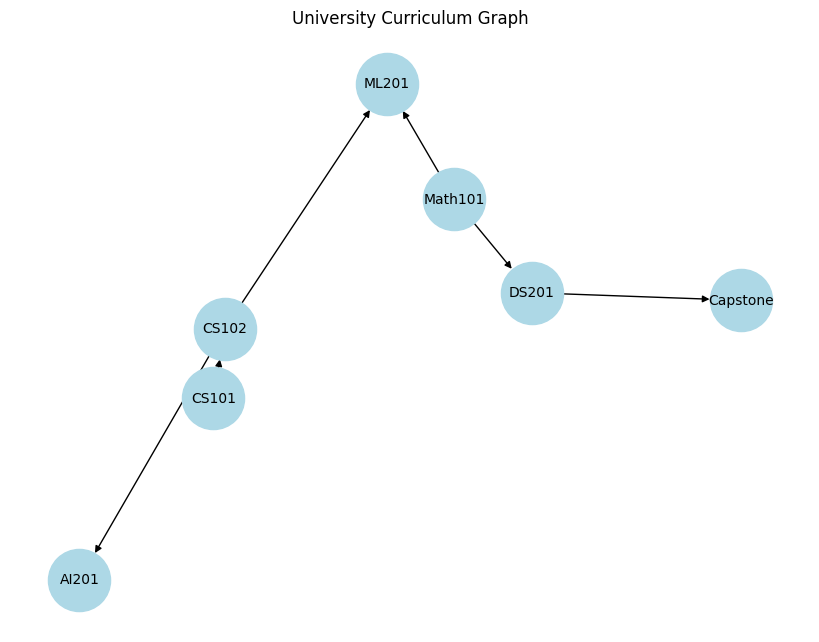

In [3]:
G = build_curriculum()
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_size=2000, node_color='lightblue', font_size=10)
plt.title("University Curriculum Graph")
plt.show()

In [4]:
students = generate_students()
student = students[1]
print("Student ID:", student["student_id"])
print("Interest:", student["interest"])
print("Completed Courses:", student["completed_courses"])
print("GPA:", student["GPA"])


Student ID: 1
Interest: Security
Completed Courses: ['Math101']
GPA: 2.45


In [5]:
env = CurriculumEnv(student, G)
env.reset()

logs = []
total_reward = 0

for term in range(6):
    eligible = env.get_eligible_courses()
    print(f"\n Term {term+1} - Eligible Courses:", eligible)

    if not eligible:
        break

    selected = random.sample(eligible, min(3, len(eligible)))
    print(f" Selected: {selected}")

    _, reward, done = env.step(selected)
    total_reward += reward

    logs.append({
        "term": term + 1,
        "selected_courses": selected,
        "GPA": student["GPA"],
        "reward": reward
    })

    if done:
        print("Graduation condition met!")
        break



 Term 1 - Eligible Courses: ['CS101', 'DS201']
 Selected: ['DS201', 'CS101']

 Term 2 - Eligible Courses: ['CS102', 'Capstone']
 Selected: ['CS102', 'Capstone']
Graduation condition met!


In [6]:
pd.DataFrame(logs)

,term,selected_courses,GPA,reward
0,1,"[DS201, CS101]",2.83,1.054064
1,2,"[CS102, Capstone]",2.94,1.674221


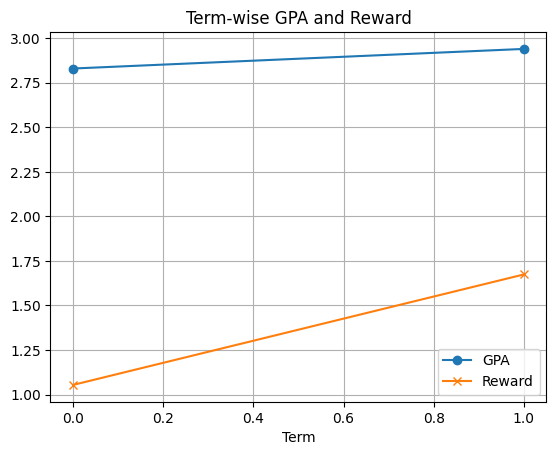

In [7]:
gpa_values = [log["GPA"] for log in logs]
rewards = [log["reward"] for log in logs]

plt.plot(gpa_values, marker='o', label='GPA')
plt.plot(rewards, marker='x', label='Reward')
plt.title("Term-wise GPA and Reward")
plt.xlabel("Term")
plt.legend()
plt.grid()
plt.show()


In [8]:
ai_student = [s for s in students if s["interest"] == "AI"][0]
ds_student = [s for s in students if s["interest"] == "Data Science"][0]
sec_student = [s for s in students if s["interest"] == "Security"][0]

In [11]:
print("AI Student:", ai_student["student_id"])
print("Data Science Student:", ds_student["student_id"])
print("Security Student:", sec_student["student_id"])

AI Student: 4
Data Science Student: 2
Security Student: 0


In [12]:
def simulate_student(student, graph):
    env = CurriculumEnv(student, graph)
    env.reset()
    gpas = []
    rewards = []
    for term in range(6):
        eligible = env.get_eligible_courses()
        if not eligible:
            break
        selected = random.sample(eligible, min(3, len(eligible)))
        _, reward, done = env.step(selected)
        gpas.append(student["GPA"])
        rewards.append(reward)
        if done:
            break
    return gpas, rewards


In [13]:
G = build_curriculum()

ai_gpa, ai_rewards = simulate_student(ai_student, G)
ds_gpa, ds_rewards = simulate_student(ds_student, G)
sec_gpa, sec_rewards = simulate_student(sec_student, G)

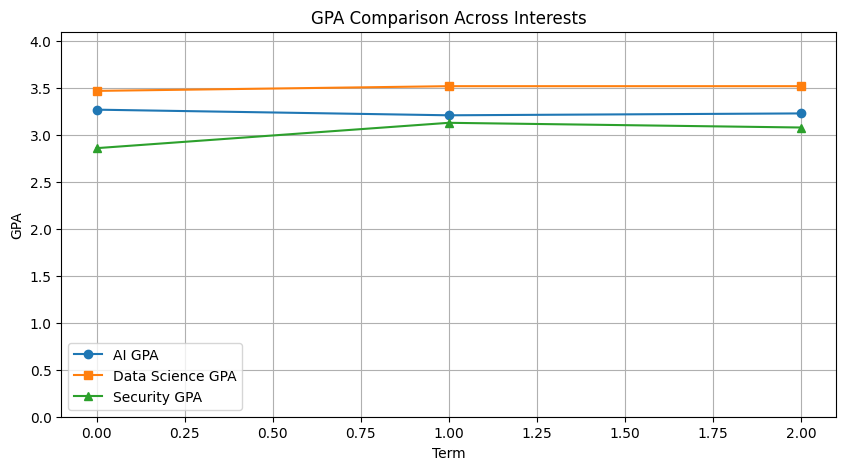

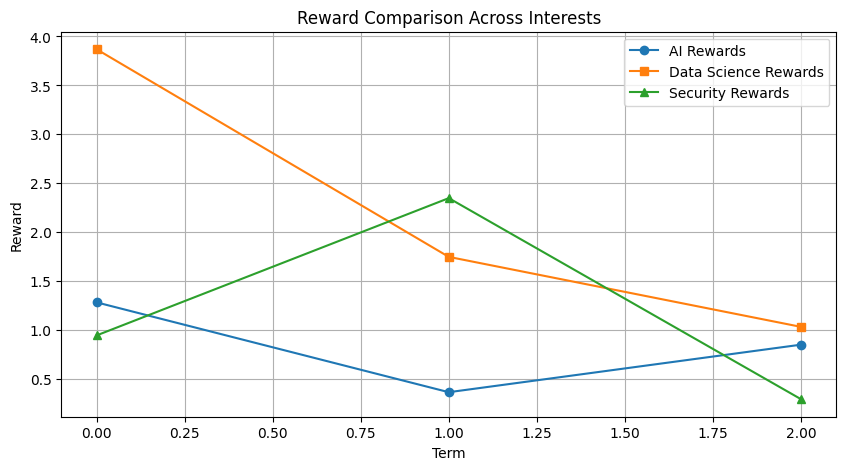

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(ai_gpa, marker='o', label='AI GPA')
plt.plot(ds_gpa, marker='s', label='Data Science GPA')
plt.plot(sec_gpa, marker='^', label='Security GPA')
plt.title("GPA Comparison Across Interests")
plt.xlabel("Term")
plt.ylabel("GPA")
plt.ylim(0, 4.1)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ai_rewards, marker='o', label='AI Rewards')
plt.plot(ds_rewards, marker='s', label='Data Science Rewards')
plt.plot(sec_rewards, marker='^', label='Security Rewards')
plt.title("Reward Comparison Across Interests")
plt.xlabel("Term")
plt.ylabel("Reward")
plt.grid(True)
plt.legend()
plt.show()